In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import importlib

from datetime import datetime

from sklearn.model_selection import train_test_split

sys.path.insert(0, os.path.abspath(".."))
import src.utils as utils
importlib.reload(utils)                      

%matplotlib inline
plt.style.use("seaborn-whitegrid")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


/tmp/ipykernel_5802/1894843148.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
from src.utils import haversine_distance

In [4]:
#paths
DATA_PATH = "../data/taxi_data.csv"
PROCESSED_PATH = "../data/train_processed.csv"
FIGURES_DIR = "../outputs/figures"
os.makedirs(FIGURES_DIR, exist_ok= True)

In [5]:
df = pd.read_csv(DATA_PATH)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
#checking for missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
#helper function to save figures
def save_fig(name, dpi=300):
    """
    Save the current matplotlib figure to the figures directory.
    """
    path = f"{FIGURES_DIR}/{name}.png"
    plt.savefig(path, dpi=dpi, bbox_inches='tight')
    print(f"Saved: {path}")

Saved: ../outputs/figures/01_trip_duration_distribution.png


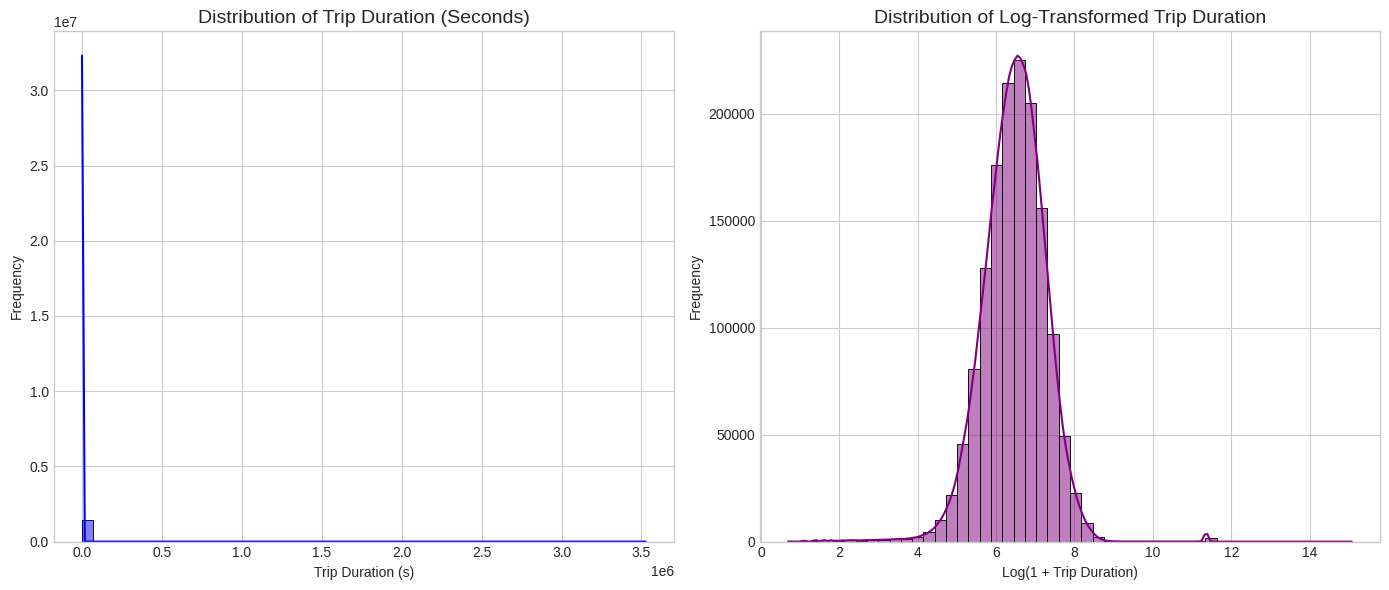

In [10]:
plt.figure(figsize=(14, 6))

# Histogram of the original trip_duration
plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'], kde=True, bins=50, color='blue')
plt.title('Distribution of Trip Duration (Seconds)', fontsize=14)
plt.xlabel('Trip Duration (s)')
plt.ylabel('Frequency')

# Histogram of the log-transformed trip_duration
plt.subplot(1, 2, 2)
# We use np.log1p which calculates log(1 + x) to handle potential zero values
sns.histplot(np.log1p(df['trip_duration']), kde=True, bins=50, color='purple')
plt.title('Distribution of Log-Transformed Trip Duration', fontsize=14)
plt.xlabel('Log(1 + Trip Duration)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
save_fig("01_trip_duration_distribution")
plt.show()

In [11]:
# Checking the datapoints for sanity

# Get the index of the min and max duration
min_duration_index = df['trip_duration'].idxmin()
max_duration_index = df['trip_duration'].idxmax()

# Retrieve the full rows using their index
row_with_min_duration = df.loc[min_duration_index]
row_with_max_duration = df.loc[max_duration_index]

print("--- Row with Minimum Trip Duration ---")
print(row_with_min_duration)
print("\n" + "="*40 + "\n")
print("--- Row with Maximum Trip Duration ---")
print(row_with_max_duration)

--- Row with Minimum Trip Duration ---
id                              id2536510
vendor_id                               1
pickup_datetime       2016-04-17 11:44:49
dropoff_datetime      2016-04-17 11:44:50
passenger_count                         1
pickup_longitude               -73.940384
pickup_latitude                 40.786423
dropoff_longitude                -73.9403
dropoff_latitude                40.786373
store_and_fwd_flag                      N
trip_duration                           1
Name: 35196, dtype: object


--- Row with Maximum Trip Duration ---
id                              id0053347
vendor_id                               1
pickup_datetime       2016-02-13 22:46:52
dropoff_datetime      2016-03-25 18:18:14
passenger_count                         1
pickup_longitude               -73.783905
pickup_latitude                 40.648632
dropoff_longitude              -73.978271
dropoff_latitude                40.750202
store_and_fwd_flag                      N
trip_durati

In [12]:
#dropping the points which don't make sense
k = 4
df = df.drop(df.nlargest(k, 'trip_duration').index)
print(df.shape)

(1458640, 11)


Saved: ../outputs/figures/02_trip_duration_distribution_after_sanity_check.png


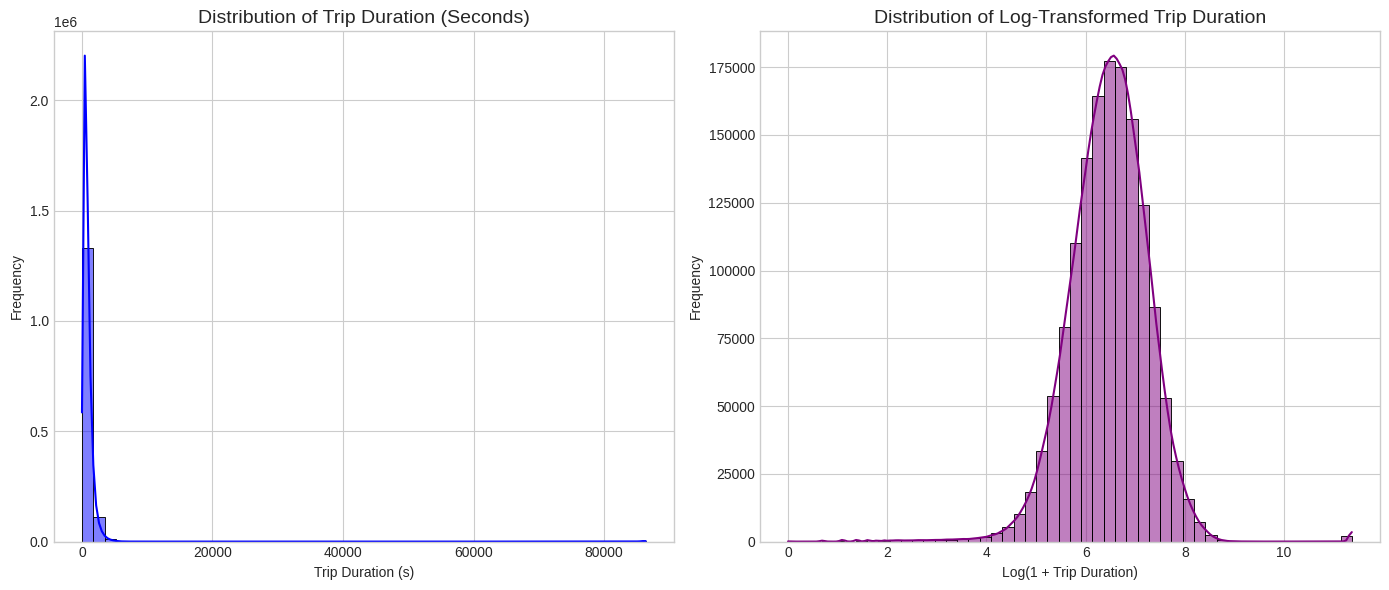

In [13]:
# Plotting the data again after processing the outlier values
plt.figure(figsize=(14, 6))

# 1. Histogram of the original trip_duration
plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'], kde=True, bins=50, color='blue')
plt.title('Distribution of Trip Duration (Seconds)', fontsize=14)
plt.xlabel('Trip Duration (s)')
plt.ylabel('Frequency')

# 2. Histogram of the log-transformed trip_duration
plt.subplot(1, 2, 2)
# We use np.log1p which calculates log(1 + x) to handle potential zero values
sns.histplot(np.log(df['trip_duration']), kde=True, bins=50, color='purple')
plt.title('Distribution of Log-Transformed Trip Duration', fontsize=14)
plt.xlabel('Log(1 + Trip Duration)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
save_fig("02_trip_duration_distribution_after_sanity_check")
plt.show()

In [14]:
#We'll use the log-transformed trip duration as the target in our project. 
df['log_trip_duration'] = np.log1p(df['trip_duration'])

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1458640,1458640,id2875421,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vendor_id,1458640.0,NaN,NaN,NaN,1.534952,0.498777,1.0,1.0,2.0,2.0,2.0
pickup_datetime,1458640,1380219,2016-03-04 08:07:34,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_datetime,1458640,1380373,2016-02-19 19:25:04,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,1458640.0,NaN,NaN,NaN,1.664531,1.314244,0.0,1.0,1.0,2.0,9.0
pickup_longitude,1458640.0,NaN,NaN,NaN,-73.973487,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529
pickup_latitude,1458640.0,NaN,NaN,NaN,40.750921,0.032881,34.359695,40.737347,40.754101,40.76836,51.881084
dropoff_longitude,1458640.0,NaN,NaN,NaN,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-61.335529
dropoff_latitude,1458640.0,NaN,NaN,NaN,40.7518,0.035891,32.181141,40.735885,40.754524,40.76981,43.921028
store_and_fwd_flag,1458640,2,N,1450595,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Saved: ../outputs/figures/03_longitude_and_latitude_distributions.png


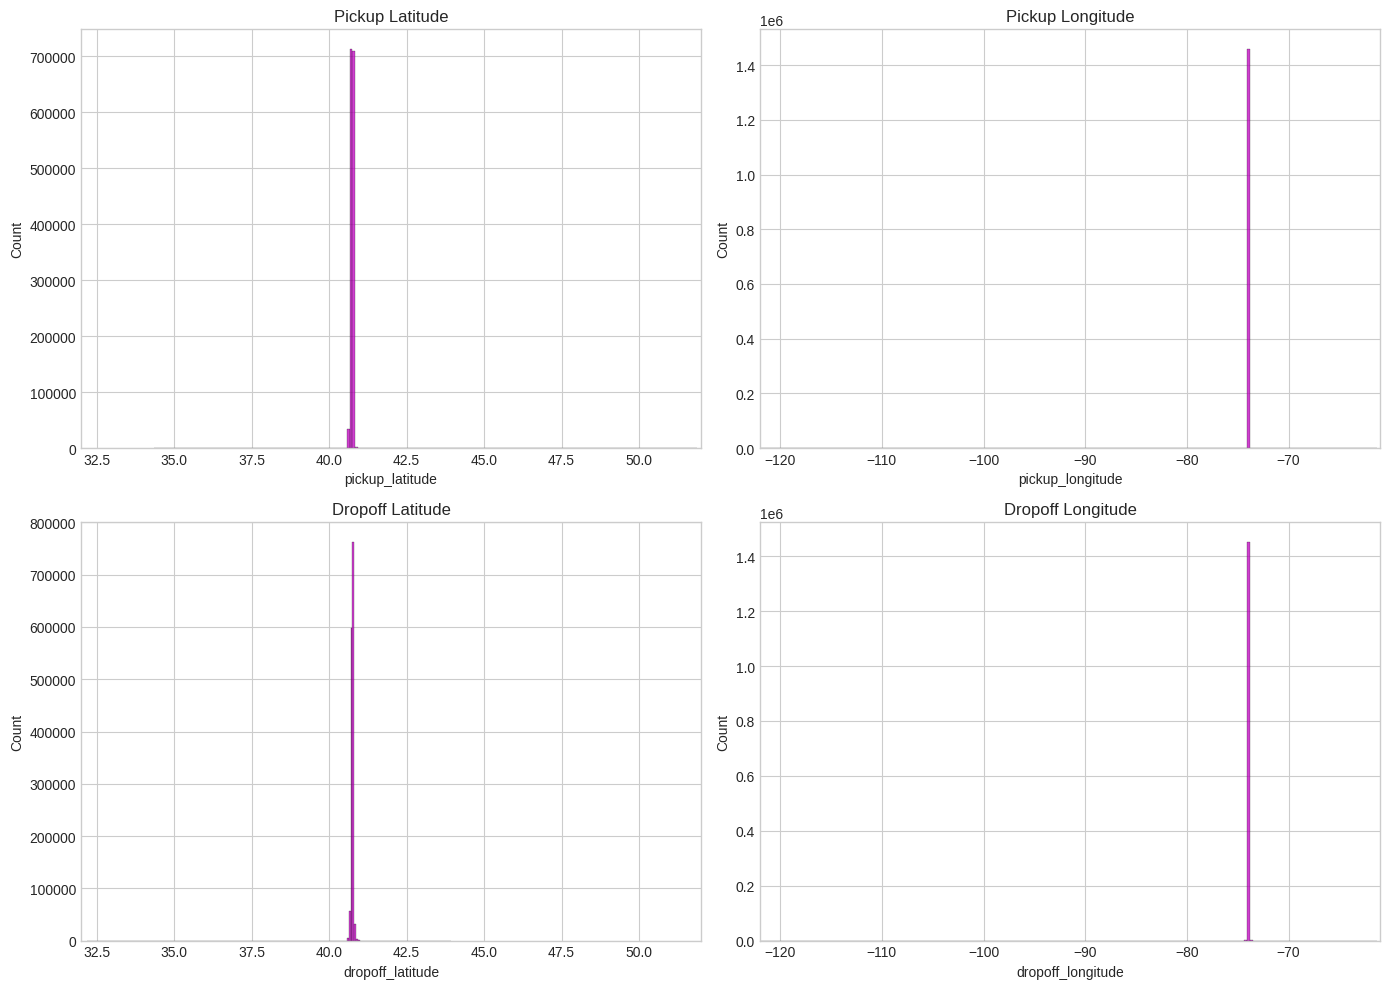

In [16]:
f, axes = plt.subplots(2, 2, figsize=(14, 10))

#set the min and max limits for the plot using minium and maximum values from the data
lat_min, lat_max = 32, 52
lon_min, lon_max = -122, -61

sns.histplot(df['pickup_latitude'], bins=200, ax=axes[0, 0], color="m")
axes[0, 0].set_title('Pickup Latitude')
axes[0, 0].set_xlim(lat_min, lat_max)

sns.histplot(df['pickup_longitude'], bins=200, ax=axes[0, 1], color="m")
axes[0, 1].set_title('Pickup Longitude')
axes[0, 1].set_xlim(lon_min, lon_max)

sns.histplot(df['dropoff_latitude'], bins=200, ax=axes[1, 0], color="m")
axes[1, 0].set_title('Dropoff Latitude')
axes[1, 0].set_xlim(lat_min, lat_max)

sns.histplot(df['dropoff_longitude'], bins=200, ax=axes[1, 1], color="m")
axes[1, 1].set_title('Dropoff Longitude')
axes[1, 1].set_xlim(lon_min, lon_max)

plt.tight_layout()
save_fig("03_longitude_and_latitude_distributions")
plt.show()

Saved: ../outputs/figures/04_pickup_and_dropoff_density.png


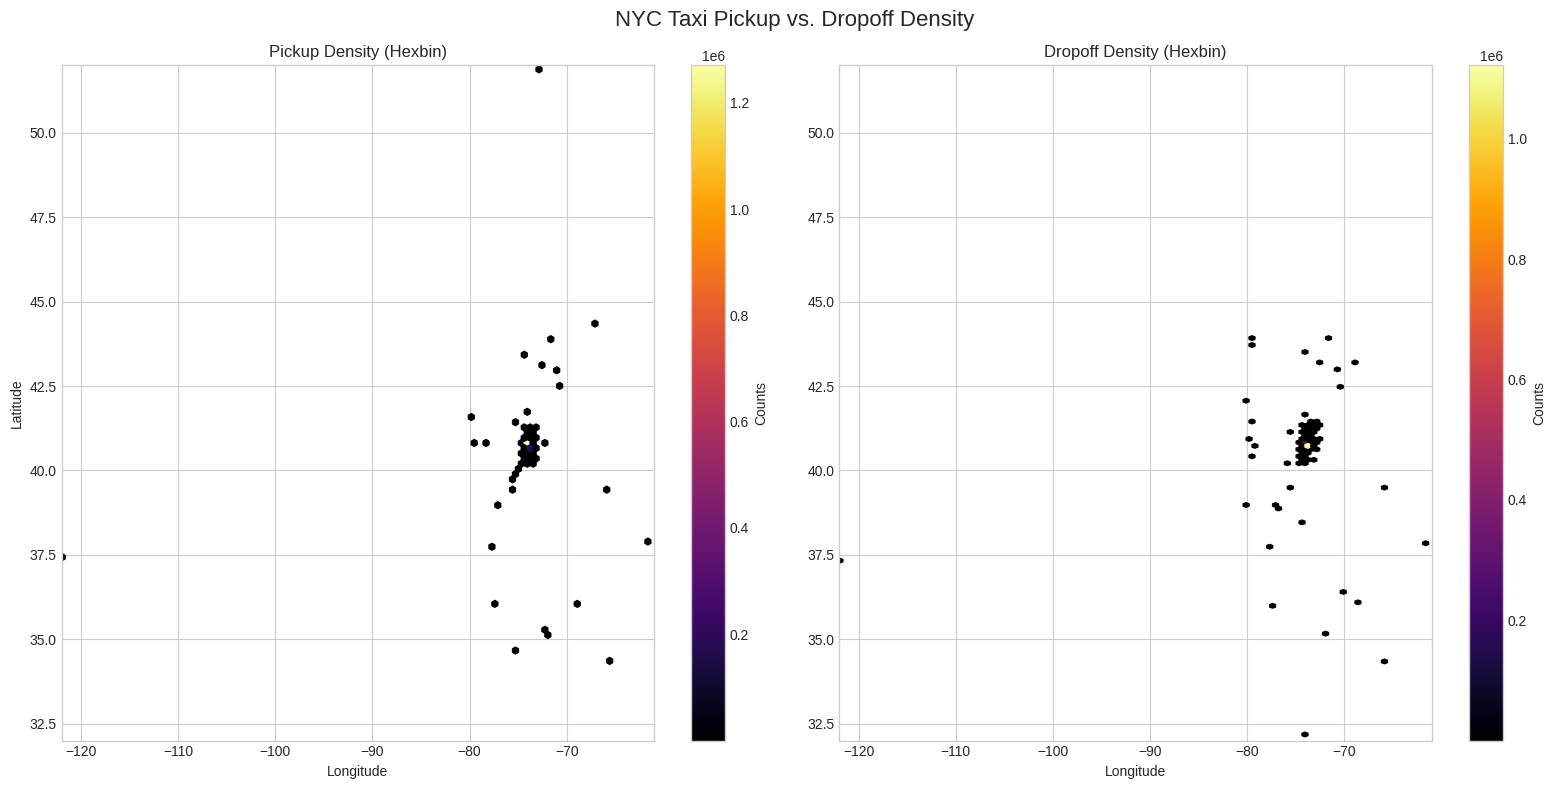

In [17]:
# Plot the hexbins of pickup and dropoff density
f, axes = plt.subplots(1, 2, figsize=(16, 8)) 

#Pickup density
hb1 = axes[0].hexbin(
    df['pickup_longitude'], 
    df['pickup_latitude'], 
    gridsize=100, 
    cmap='inferno', 
    mincnt=1
)
f.colorbar(hb1, ax=axes[0], label='Counts')

axes[0].set_title("Pickup Density (Hexbin)")
axes[0].set_xlim(lon_min, lon_max)
axes[0].set_ylim(lat_min, lat_max)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

#Dropoff density
hb2 = axes[1].hexbin(
    df['dropoff_longitude'], 
    df['dropoff_latitude'], 
    gridsize=100, 
    cmap='inferno', 
    mincnt=1
)
f.colorbar(hb2, ax=axes[1], label='Counts')

axes[1].set_title("Dropoff Density (Hexbin)")
axes[1].set_xlim(lon_min, lon_max)
axes[1].set_ylim(lat_min, lat_max)
axes[1].set_xlabel("Longitude")


f.suptitle("NYC Taxi Pickup vs. Dropoff Density", fontsize=16)

plt.tight_layout()
save_fig("04_pickup_and_dropoff_density")
plt.show()

In [18]:
# 1.converts pickup_datetime and dropoff_datetime in to datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# 2. store_and_fwd_flag column should be converted from N/Y to 0/1
df['store_and_fwd_flag'] = (df['store_and_fwd_flag'] == 'Y').astype(int)

In [19]:
# Create a new 'Haversine_distance' column by calling the function
df['haversine_distance'] = haversine_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

# Adding the Manhattan distance column
df['dist_lat'] = haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                    df['dropoff_latitude'], df['pickup_longitude'])

df['dist_lon'] = haversine_distance(df['dropoff_latitude'], df['pickup_longitude'],
                                    df['dropoff_latitude'], df['dropoff_longitude'])

df['manhattan_distance'] = df['dist_lat'] + df['dist_lon']
df.drop(columns=['dist_lat','dist_lon'], inplace=True)

In [20]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,haversine_distance,manhattan_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,6.122493,1.498521,1.735485
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6.498282,1.805507,2.430685
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,7.661527,6.385098,8.205369
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6.063785,1.485498,1.661369
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,6.077642,1.188588,1.199459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,6.658011,1.225080,1.665981
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,6.486161,6.049836,8.056663
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,6.639876,7.824606,10.649170
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,5.924256,1.092564,1.521774


In [21]:
# Extract basic date/time components
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_week_day'] = df['pickup_datetime'].dt.dayofweek #Monday=0, Sunday=6
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day_of_year'] = df['pickup_datetime'].dt.dayofyear
df['pickup_minute'] = df['pickup_datetime'].dt.minute

# Weekend Indicator
# We check if the 'pickup_week_day' is Saturday (5) or Sunday (6)
df['weekend_indicator'] = (df['pickup_week_day'] >= 5).astype(int)

# Rush Hour Indicator
def is_rush_hour(h):
    return int(
        (7 <= h <= 10) or (16 <= h <= 19)
    )

df['rush_hour'] = df['pickup_hour'].apply(is_rush_hour)

#Spatial distance features
df['abs_delta_lat'] = (df['dropoff_latitude'] - df['pickup_latitude']).abs()
df['abs_delta_lon'] = (df['dropoff_longitude'] - df['pickup_longitude']).abs()

#Manhattan direction
df['direction_NS'] = (df['dropoff_latitude'] > df['pickup_latitude']).astype(int)
df['direction_EW'] = (df['dropoff_longitude'] > df['pickup_longitude']).astype(int)


In [22]:

# ---- Cyclical time encoding ----
df['pickup_hour_sin'] = np.sin(2 * np.pi * df['pickup_hour'] / 24)
df['pickup_hour_cos'] = np.cos(2 * np.pi * df['pickup_hour'] / 24)
df['pickup_weekday_sin'] = np.sin(2 * np.pi * df['pickup_week_day'] / 7)
df['pickup_weekday_cos'] = np.cos(2 * np.pi * df['pickup_week_day'] / 7)
df['pickup_minute_sin'] = np.sin(2 * np.pi * df['pickup_minute'] / 60)
df['pickup_minute_cos'] = np.cos(2 * np.pi * df['pickup_minute'] / 60)


In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,abs_delta_lat,abs_delta_lon,direction_NS,direction_EW,pickup_hour_sin,pickup_hour_cos,pickup_weekday_sin,pickup_weekday_cos,pickup_minute_sin,pickup_minute_cos
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,0.002335,0.017525,0,1,-0.965926,-0.258819,0.000000,1.000000,5.877853e-01,-0.809017
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0.007412,0.019066,0,0,0.000000,1.000000,-0.781831,0.623490,-9.781476e-01,-0.207912
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,0.053852,0.026306,0,0,0.258819,-0.965926,0.781831,0.623490,-5.000000e-01,-0.866025
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,0.013252,0.002228,0,0,-0.965926,0.258819,0.974928,-0.222521,-2.079117e-01,-0.978148
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,0.010689,0.000130,0,1,-0.258819,-0.965926,-0.974928,-0.222521,5.665539e-16,-1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458640 entries, 0 to 1458643
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458640 non-null  object        
 1   vendor_id           1458640 non-null  int64         
 2   pickup_datetime     1458640 non-null  datetime64[ns]
 3   dropoff_datetime    1458640 non-null  datetime64[ns]
 4   passenger_count     1458640 non-null  int64         
 5   pickup_longitude    1458640 non-null  float64       
 6   pickup_latitude     1458640 non-null  float64       
 7   dropoff_longitude   1458640 non-null  float64       
 8   dropoff_latitude    1458640 non-null  float64       
 9   store_and_fwd_flag  1458640 non-null  int64         
 10  trip_duration       1458640 non-null  int64         
 11  log_trip_duration   1458640 non-null  float64       
 12  haversine_distance  1458640 non-null  float64       
 13  manhattan_distanc

Saved: ../outputs/figures/05_trip_duration_and_haversine_distance.png


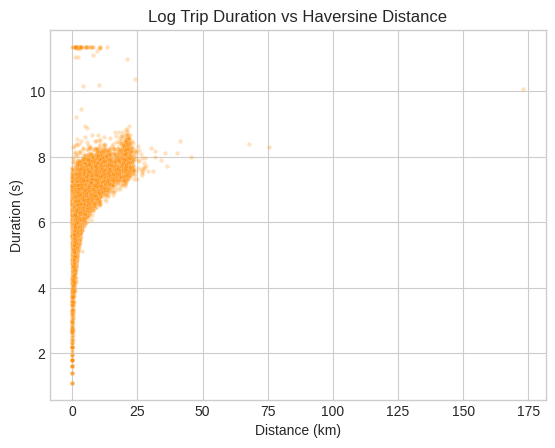

In [25]:
# Trip Duration vs Haversine Distance
sns.scatterplot(
    data=df.sample(30000, random_state=42),
    x="haversine_distance",
    y="log_trip_duration",
    alpha=0.25,
    s=10,
    color="darkorange"
)
plt.title("Log Trip Duration vs Haversine Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Duration (s)")
save_fig("05_trip_duration_and_haversine_distance")
plt.show()


/tmp/ipykernel_5802/420783939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["pickup_hour"], palette="viridis")


Saved: ../outputs/figures/06_hourly_pickup_counts.png


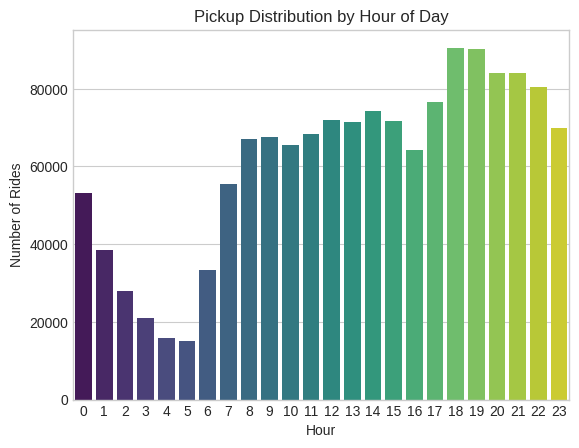

In [26]:
#Hourly pickup counts
sns.countplot(x=df["pickup_hour"], palette="viridis")
plt.title("Pickup Distribution by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
save_fig("06_hourly_pickup_counts")
plt.show()


Saved: ../outputs/figures/07_average_trip_duration_by_hours.png


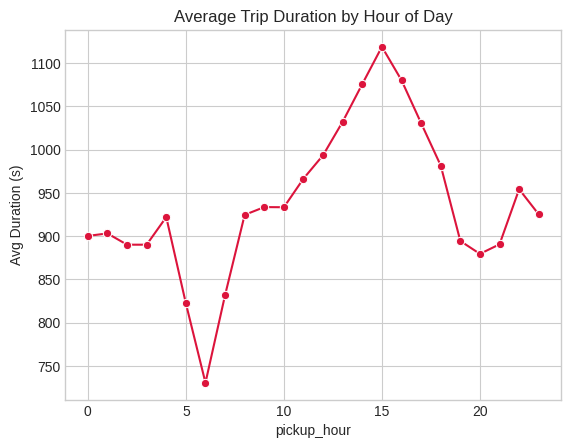

In [27]:
#Average Trip Duration by Hour
hourly = df.groupby("pickup_hour")['trip_duration'].mean().reset_index()

sns.lineplot(data=hourly, x="pickup_hour", y="trip_duration", marker="o", color="crimson")
plt.title("Average Trip Duration by Hour of Day")
plt.ylabel("Avg Duration (s)")
save_fig("07_average_trip_duration_by_hours")
plt.show()


Saved: ../outputs/figures/08_average_distance_by_day_of_week.png


/tmp/ipykernel_5802/3859548950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dow_dist, x="pickup_week_day", y="haversine_distance", palette="coolwarm")


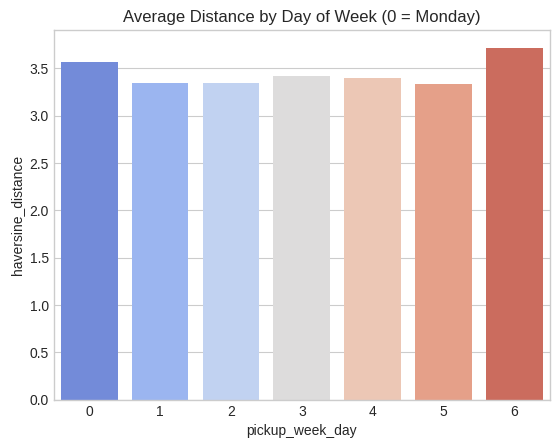

In [28]:
#Day of Week vs Distance
dow_dist = df.groupby("pickup_week_day")['haversine_distance'].mean().reset_index()

sns.barplot(data=dow_dist, x="pickup_week_day", y="haversine_distance", palette="coolwarm")
plt.title("Average Distance by Day of Week (0 = Monday)")
save_fig("08_average_distance_by_day_of_week")
plt.show()


Saved: ../outputs/figures/09_cyclical_encoding_of_pickup_hour.png


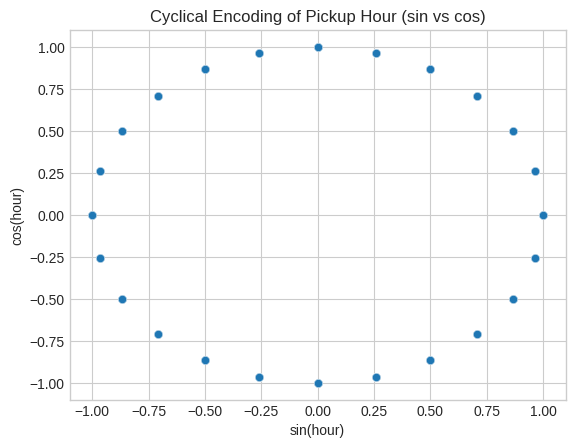

In [29]:
#Hour Sin/Cos Relationship
sns.scatterplot(
    x=df["pickup_hour_sin"].sample(20000, random_state=42),
    y=df["pickup_hour_cos"].sample(20000, random_state=42),
    alpha=0.3
)
plt.title("Cyclical Encoding of Pickup Hour (sin vs cos)")
plt.xlabel("sin(hour)")
plt.ylabel("cos(hour)")
save_fig("09_cyclical_encoding_of_pickup_hour")
plt.show()


/tmp/ipykernel_5802/3112492622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Saved: ../outputs/figures/10_rush_hour_vs_normal_hour_trip_duration.png


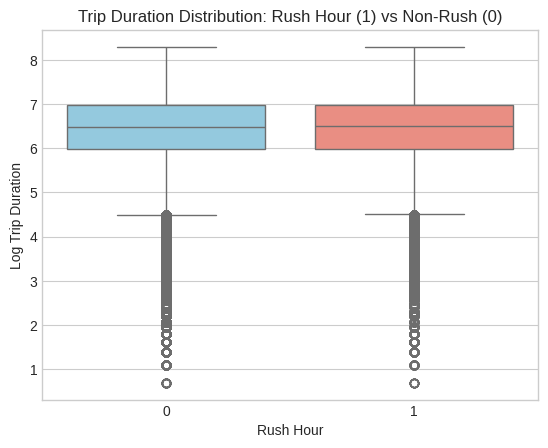

In [30]:
#Rush Hour vs Normal Hour Duration Distribution
sns.boxplot(
    data=df[df['trip_duration'] < 4000], 
    x="rush_hour", 
    y="log_trip_duration",
    palette=["skyblue","salmon"]
)
plt.title("Trip Duration Distribution: Rush Hour (1) vs Non-Rush (0)")
plt.xlabel("Rush Hour")
plt.ylabel("Log Trip Duration")
save_fig("10_rush_hour_vs_normal_hour_trip_duration")
plt.show()


Saved: ../outputs/figures/11_correlation_map.png


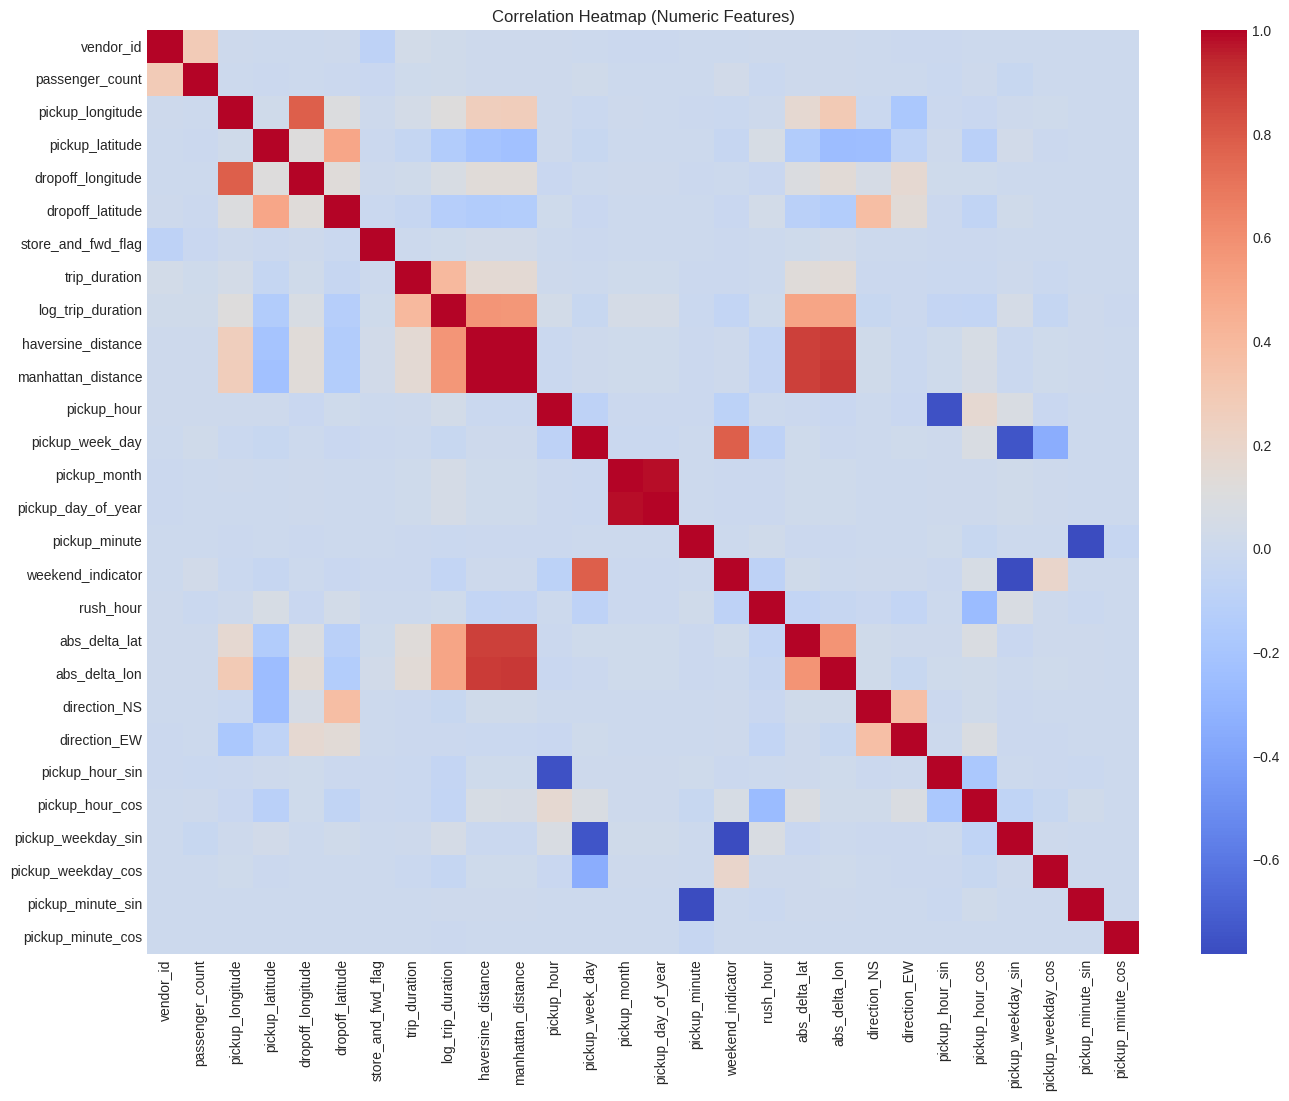

In [31]:
#Correlation Heatmap of All Numerical Features
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
save_fig("11_correlation_map")
plt.show()

Saved: ../outputs/figures/12_pairplot_for_key_features.png


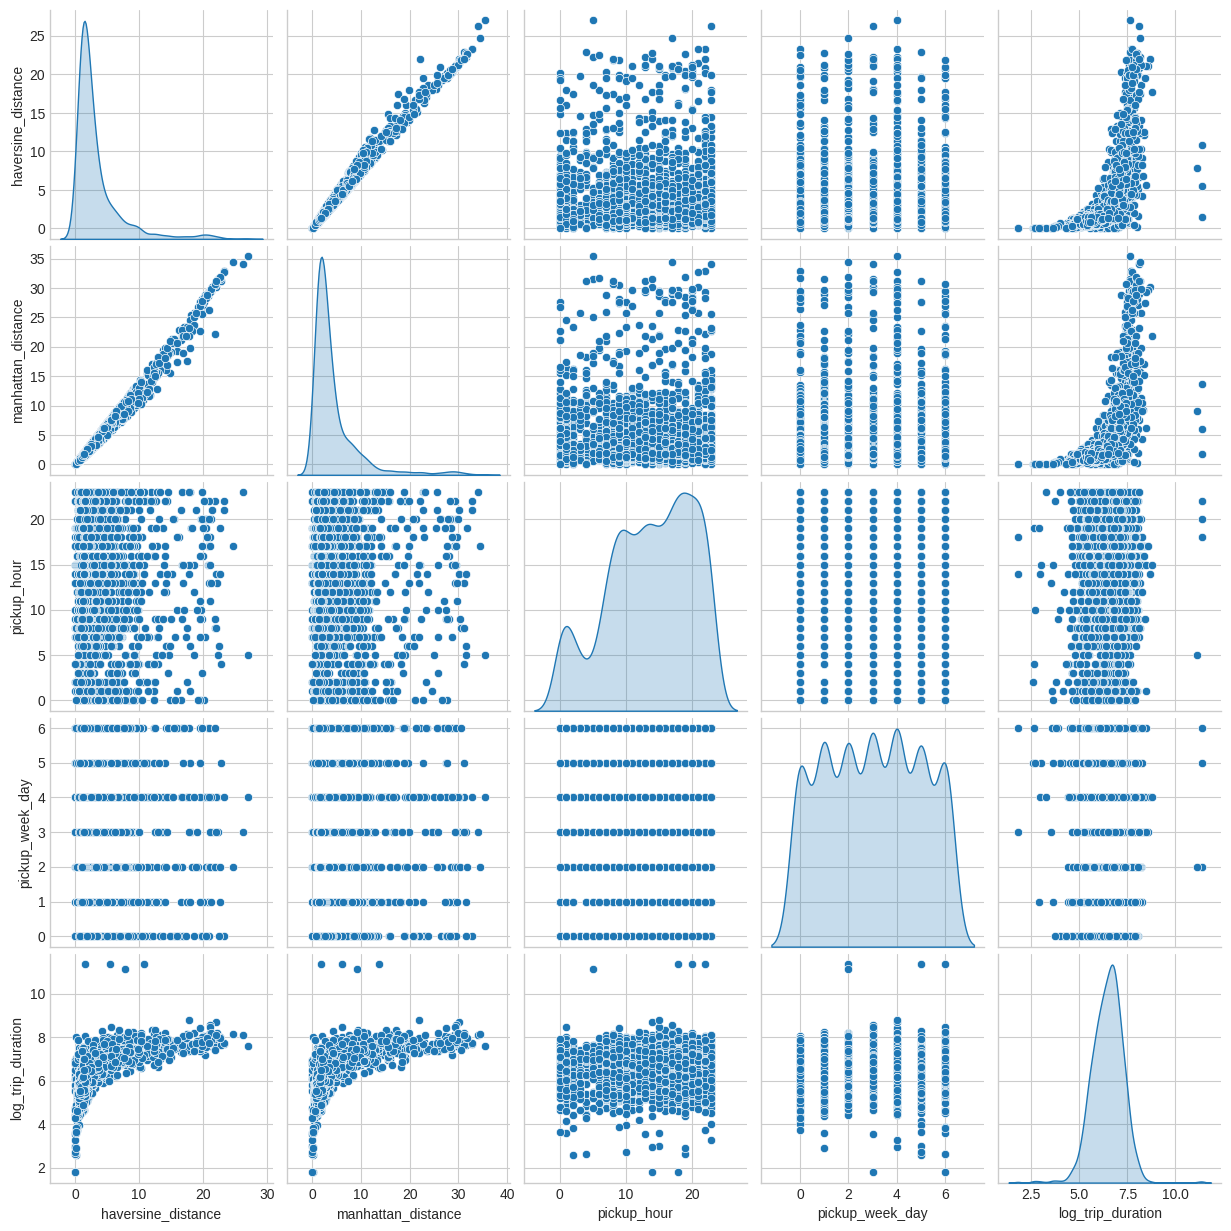

In [32]:
# Pairplot for Key Features
sns.pairplot(
    df.sample(3000, random_state=42)[[
        "haversine_distance",
        "manhattan_distance",
        "pickup_hour",
        "pickup_week_day",
        "log_trip_duration"
    ]],
    diag_kind="kde"
)
save_fig("12_pairplot_for_key_features")
plt.show()


/tmp/ipykernel_5802/2611412883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Saved: ../outputs/figures/13_passanger_count_vs_duration.png


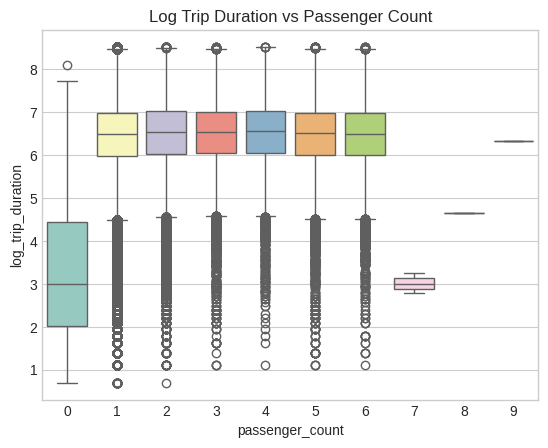

In [33]:
#Passanger Count vs Duration 
sns.boxplot(
    data=df[df['trip_duration'] < 5000],
    x="passenger_count",
    y="log_trip_duration",
    palette="Set3"
)
plt.title("Log Trip Duration vs Passenger Count")
save_fig("13_passanger_count_vs_duration")
plt.show()


## Adding the class label for ride acceptance


In [34]:
#  Create the binary label 'accepted' (1 = accept, 0 = reject)
#  Rules:
#  A: distance < 1 km -> reject (0)
#  B: distance > 50 km -> reject (0)
#  C: distance < 3 km AND rush_hour -> reject (0)
#  D: pickup_hour between 0 and 5 (inclusive) -> reject (0)
#  Otherwise -> accept (1)

# vectorized assignment
cond_A = df['manhattan_distance'] < 1.0
cond_B = df['manhattan_distance'] > 50.0
cond_C = (df['manhattan_distance'] < 3.0) & (df['rush_hour'] == 1)
cond_D = df['pickup_hour'].between(0, 5)   # inclusive 0..5

df['accepted'] = (~(cond_A | cond_B | cond_C | cond_D)).astype(int)

In [35]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,abs_delta_lon,direction_NS,direction_EW,pickup_hour_sin,pickup_hour_cos,pickup_weekday_sin,pickup_weekday_cos,pickup_minute_sin,pickup_minute_cos,accepted
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,0.017525,0,1,-0.965926,-0.258819,0.000000,1.000000,5.877853e-01,-0.809017,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0.019066,0,0,0.000000,1.000000,-0.781831,0.623490,-9.781476e-01,-0.207912,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,0.026306,0,0,0.258819,-0.965926,0.781831,0.623490,-5.000000e-01,-0.866025,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,0.002228,0,0,-0.965926,0.258819,0.974928,-0.222521,-2.079117e-01,-0.978148,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,0.000130,0,1,-0.258819,-0.965926,-0.974928,-0.222521,5.665539e-16,-1.000000,1


In [36]:
#Checking for class imbalance
count = df['accepted'].value_counts().sort_index()
percent = df['accepted'].value_counts(normalize=True).sort_index() * 100
print("Accepted label distribution:")
display(pd.concat([count, percent], axis=1))

Accepted label distribution:


,count,proportion
accepted,,
0,581021,39.833064
1,877619,60.166936


Saved: ../outputs/figures/14_acceptance_distribution.png


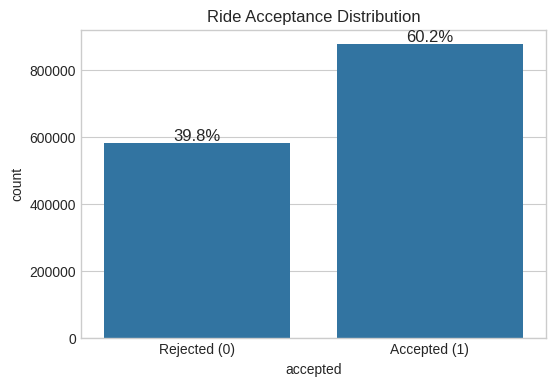

In [37]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='accepted', data=df)

# Compute percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=12)

plt.xticks([0,1], ['Rejected (0)', 'Accepted (1)'])
plt.title('Ride Acceptance Distribution')
save_fig("14_acceptance_distribution")
plt.show()

In [38]:
df_final = df.copy()
train80, test20 = train_test_split(df_final, test_size=0.20, random_state=42, shuffle=True)
train70, test30 = train_test_split(df_final, test_size=0.30, random_state=42, shuffle=True)

train80 = train80.reset_index(drop=True)
test20 = test20.reset_index(drop=True)
train70 = train70.reset_index(drop=True)
test30 = test30.reset_index(drop=True)

train80.to_csv("../data/train80.csv", index=False)
test20.to_csv("../data/test20.csv", index=False)
print("Saved train80.csv and test20.csv")

train70.to_csv("../data/train70.csv", index=False)
test30.to_csv("../data/test30.csv", index=False)
print("Saved train70.csv and test30.csv")

Saved train80.csv and test20.csv
Saved train70.csv and test30.csv
